In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\LENOVO\\Desktop\\VIT hack-a-thon\\chennai rainfall')

In [3]:
data_set = pd.read_csv('chennai from 1950.csv')

In [4]:
df = data_set.copy()
df.head()

,Year,Population,GrowthRate,Growth,Location
0,1950,1491293,0.0000,0,Chennai
1,1951,1554324,0.0423,63031,Chennai
2,1952,1590811,0.0235,36487,Chennai
3,1953,1628050,0.0234,37239,Chennai
4,1954,1666214,0.0234,38164,Chennai


[Text(0.5, 1.0, 'Chennai Population from 1950 to 2021')]

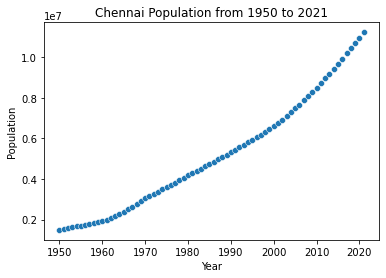

In [5]:
sns.scatterplot(x=df['Year'], y=df['Population']).set(title='Chennai Population from 1950 to 2021')

In [8]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
lc.fit(df['Location'])
TIME = lc.transform(df['Location'])
df['Country'] = TIME
df.drop(['Location'],axis=1,inplace=True)
X = df.drop(['Population'],axis=1)
y = df['Population'].to_numpy()
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
predictions = lm.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

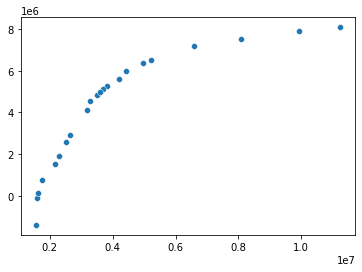

In [13]:
sns.scatterplot(y_test, predictions)

In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1295364.464690991
MSE: 2226653766506.1294
RMSE: 1492197.6298420157
